# Lab 1

In [1]:
# Import the libraries we'll use below.
import numpy as np
import matplotlib.pyplot as plt

## Data as matrices
Data usually comes in the form of matrices. The Python Numpy library makes it easy to manipulate matrices efficiently. See the [Numpy Tutorial](https://docs.scipy.org/doc/numpy/user/quickstart.html) for details.

In [2]:
# Print these to make sure you understand what is being generated.

A = np.array([1, 2, 3])
# A simple array containing 1 row and 3 columns
print('Here is A:\n', A)
print('Shape of A:', A.shape)

B = np.arange(1, 13).reshape(3, 4)
# An array of of 13 values starting with 1 that contains 3 rows and 4 columns. 
print('Here is B:\n', B)
print('Shape of B:', B.shape)

C = np.ones((2, 3))
# creates 2 rows and 3 columns all with the value of 1.
print('Here is C:\n', C)
print('Shape of C:', C.shape)

D = np.eye(3)
# creates 3 rows and 3 columns where a value of 1 in the diagonal and 0 everywhere else.  
print('Here is D:\n', D)
print('Shape of D', D.shape)

Here is A:
 [1 2 3]
Shape of A: (3,)
Here is B:
 [[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
Shape of B: (3, 4)
Here is C:
 [[1. 1. 1.]
 [1. 1. 1.]]
Shape of C: (2, 3)
Here is D:
 [[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
Shape of D (3, 3)


---
### Exercise 1: Matrix manipulation (8 points)

Perform the following computations using numpy functions and print the results. Note that the `*` operator implies matrix multiplication -- make sure the dimensions align!
1. 2A + 1
2. Sum the rows of B
3. Sum the columns of B
4. Number of elements of B greater than 5
5. C + C
6. A * B
7. (B * B) - D

In [3]:
#1. 2A + 1
a = (2*A)+1
print('Matrix A after computations:\n', a)

#2. Sum the rows of B
br =  B.sum(axis=1)
print('Sum of each row in B:\n', br)

#3. Sum the columns of B
bc =  B.sum(axis=0)
print('Sum of each column in B:\n', bc)

#4. Number of elements of B greater than 5
b = B > 5
print('Sum of values greater than 5 in B:\n', b.sum())

#5. C + C
c = C+C
print('Matrix C after computations:\n', c)

#6. A * B 
ab = A.dot(B)
print('Matrix AB after computations:\n', ab)
print('part 7:\n')

#7. (B * B) - D
bb = B.dot(B.T)
bbd = bb-D
print('Matrix after computations:\n', bbd)

Matrix A after computations:
 [3 5 7]
Sum of each row in B:
 [10 26 42]
Sum of each column in B:
 [15 18 21 24]
Sum of values greater than 5 in B:
 7
Matrix C after computations:
 [[2. 2. 2.]
 [2. 2. 2.]]
Matrix AB after computations:
 [38 44 50 56]
part 7:

Matrix after computations:
 [[ 29.  70. 110.]
 [ 70. 173. 278.]
 [110. 278. 445.]]


---

## Data for Supervised Learning
Supervised learning is all about learning to make predictions: given an input $x$ (e.g. home square footage), can we produce an output $\hat{y}$ (e.g. estimated value) as close to the actual observed output $y$ (e.g. sale price) as possible. Note that the "hat" above $y$ is used to denote an estimated or predicted value.

Let's start by generating some artificial data. We'll create a vector of inputs, $X$, and a corresponding vector of target outputs $Y$. In general, we'll refer to invidual examples with a lowercase ($x$), and a vector or matrix containing multiple examples with a capital ($X$).

In [4]:
def create_1d_data(num_examples=10, w=2, b=1, random_scale=1):
  """Create X, Y data with a linear relationship with added noise.

  Args:
    num_examples: number of examples to generate
    w: desired slope
    b: desired intercept
    random_scale: add uniform noise between -random_scale and +random_scale

  Returns:
    X and Y with shape (num_examples)
  """
  X = np.arange(num_examples)
  np.random.seed(4)  # consistent random number generation
  deltas = np.random.uniform(low=-random_scale, high=random_scale, size=X.shape)
  Y = b + deltas + w * X
  return X, Y

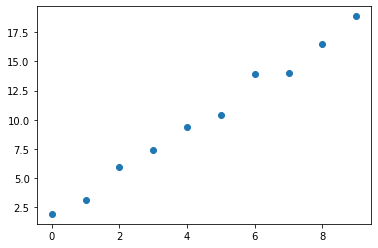

In [5]:
# Create some artificial data using create_1d_data.
X, Y = create_1d_data()
plt.scatter(X, Y)
plt.show()

---
### Exercise 2: Models for Data (8 points)

A model is a function that takes an input $x$ and produces a prediction $\hat{y}$.

Let's consider two possible models for this data:
1. $M_1(x) = x+5$ 
2. $M_2(x) = 2x+1$

Compute the predictions of models $M_1$ and $M_2$ for the values in $X$. These predictions should be vectors of the same shape as $Y$. Then plot the prediction lines of these two models overlayed on the "observed" data $(X, Y)$. Use [plt.plot()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html) to draw the lines.

Model 1 (Green Line):
 [ 5  6  7  8  9 10 11 12 13 14]
Model 2 (Orange Line):
 [ 1  3  5  7  9 11 13 15 17 19]


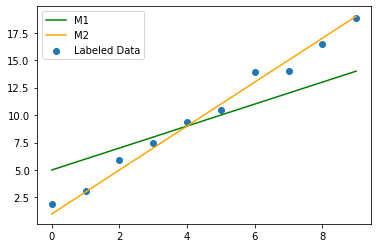

In [9]:
# Model One
M1 = X + 5
print('Model 1 (Green Line):\n', M1)

# Model Two
M2 = (2*X)+1
print('Model 2 (Orange Line):\n', M2)

plt.scatter(X, Y)
plt.plot(M1, color="green")
plt.plot(M2, color="orange")
plt.legend(["M1", "M2", "Labeled Data"], loc ="upper left")
plt.show()

---

## Evaluation Metrics

How good are our models? Intuitively, the better the model, the more closely it fits the data we have. That is, for each $x$, we'll compare $y$, the true value, with $\hat{y}$, the predicted value. This comparison is often called the *loss* or the *error*. One common such comparison is *squared error*: $(y-\hat{y})^2$. Averaging over all our data points, we get the *mean squared error*:

\begin{equation}
\textit{MSE} = \frac{1}{|Y|} \sum_{y_i \in Y}(y_i - \hat{y}_i)^2
\end{equation}

---
### Exercise 3: Computing MSE (8 points)

Write a function for computing the MSE metric and use it to compute the MSE for the two models above, $M_1$ and $M_2$.

In [31]:
def MSE(true_values, predicted_values):
  """Return the MSE between true_values and predicted values."""
  mse = np.square(np.subtract(true_values, predicted_values)).mean()
  return mse

In [32]:
print ('MSE for M1:', MSE(Y, M1))
print ('MSE for M2:', MSE(Y, M2))

MSE for M1: 6.839502909434264
MSE for M2: 0.45821672338761366


---

## Generalization

Our data $(X, Y)$ represents just a sample of all possible input-output pairs we might care about. A model will be useful to the extent we can apply it to new inputs. Consider the more complex model below, which appears to produce a much smaller mean squared error.

MSE for M3: 0.10941956925529832


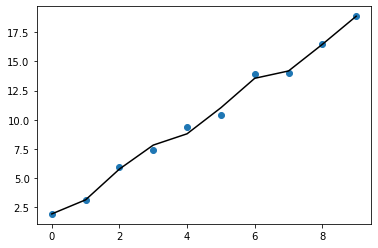

In [36]:
# Fit an 8-th degree polynomial to (X, Y). See np.polyfit for details.
polynomial_model_coefficients = np.polyfit(X, Y, deg=8)
polynomial_model = np.poly1d(polynomial_model_coefficients)
M3 = polynomial_model(X)
fig = plt.scatter(X, Y)
plt.plot(X, M3, '-k')
print ('MSE for M3:', MSE(Y, M3))

---
### Exercise 4: Generalization (8 points)

Explain whether you expect $M_3$ to be better than $M_2$ at predicting the labels for new unseen inputs.

*Writen answer:* While M2 is a good linear model, it has a slightly higher mean squared error as compared to M3 (a polyinomal model). I would expect M2 to be better at predicting the label for new unseen inputs as it more general and the relationship of the data looks linear. M3 does not appear to overfit across the true labels and does have a smaller MSE, but once more data is provided I am not sure it would be better than the more general M2. Even though M2 has a larger loss/error from the true labels based on the calculated MSE I think it would be better at generalizing predicitions closer to the true value labels. 

---

## Review

* In **Supervised Machine Learning**, we must start with data in the form $(X,Y)$ where $X$ are the inputs and $Y$ are the output labels.
* A **model** is a function that maps an input $x$ to an output $y$. The model's output is referred to as a **prediction**, denoted by $\hat{y}$.
* We **evaluate** predictions by comparing them to the true labels. This measurement is called a **loss** or **error**. For real-valued data, **mean squared error** is a common metric.
* A model is only as good as its ability to **generalize** to new examples.